In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Missing values :   
As previously seen age , Cabin, Embarked, Fare have missing values.


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 1. Embarked

Since embarked has only 2 missing values, we replace it with the most occuring value

In [7]:
train.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [8]:
train.Embarked.fillna(train.Embarked.mode()[0], inplace = True)


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 2. Cabin and Ticket
### We can drop cabin and ticket

In [11]:
train = train.drop(["Cabin","Ticket"],axis = 1)
test = test.drop(["Cabin","Ticket"],axis = 1)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


## 3. Age
### We fill the age with random values based on mean and sd
(https://medium.com/@praveen.orvakanti/this-will-help-you-score-95-percentile-in-the-kaggle-titanic-ml-competition-aa2b3fd1b79b)

In [13]:
data = [train,test]
for df in data:
    # calculating mean and std
    mean = df.Age.mean()
    std  = df.Age.std()
    is_null = df.Age.isnull().sum()
    
    # finding the random values to be filled
    rand_age = np.random.randint(mean-std,mean+std,size = is_null)
    
    # filling the train data with the missing values
    age = df.Age.copy()
    age[np.isnan(age)] = rand_age
    df.Age = age
    df.Age = df.Age.astype(int)


In [14]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,32,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,30.0000,C



## 4. Fare.
### We will replace the missing value in test data for fare with mode value

In [15]:
test.Fare = test.fillna(test.Fare.mode()[0])

## Creating new features from parch and sibsp
### We create 2 features called family and is_alone fromt these

In [16]:
data = [train,test]
for df in data:
    df["Family"] = df.Parch + df.SibSp
    df["Is_alone"] = df.Family == 0
    

In [17]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,1,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,1,False
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,13.0000,S,0,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,30.0000,S,0,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,32,1,2,23.4500,S,3,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,30.0000,C,0,True


### Making the data ready to feed to model

We will convert the Name to numerical data by using the titles.   
We will make bins for age and fare

In [18]:
# Extracting titles and giving them numbers
titles = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [19]:
titles.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Mme           1
Lady          1
Don           1
Sir           1
Countess      1
Jonkheer      1
Ms            1
Capt          1
Name: Name, dtype: int64

### We can use  Mr, Miss, Mrs, Master and Rest

In [20]:
data = [train,test]
for df in data:
    # extract titles
    df["Title"] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
    # replacing the titles with numbers
    df['Title'] = df['Title'].replace(['Mlle', 'Ms'],"Miss")
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona','Mme'], "Rest")
    df.drop(["Name"], axis = 1, inplace = True)
    
train   

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Is_alone,Title
0,1,0,3,male,22,1,0,7.2500,S,1,False,Mr
1,2,1,1,female,38,1,0,71.2833,C,1,False,Mrs
2,3,1,3,female,26,0,0,7.9250,S,0,True,Miss
3,4,1,1,female,35,1,0,53.1000,S,1,False,Mrs
4,5,0,3,male,35,0,0,8.0500,S,0,True,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27,0,0,13.0000,S,0,True,Rest
887,888,1,1,female,19,0,0,30.0000,S,0,True,Miss
888,889,0,3,female,32,1,2,23.4500,S,3,False,Miss
889,890,1,1,male,26,0,0,30.0000,C,0,True,Mr


### Age bins

In [21]:
train.Age.describe()

count    891.000000
mean      29.345679
std       13.535535
min        0.000000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

We see that age ranges from 0 - 80

In [22]:
data = [train,test]
for df in data:
    df['Age_Range'] = pd.cut(df.Age, [0, 10, 20, 30, 40, 50, 60,70,80])
    df.drop(["Age"], axis = 1, inplace = True)

In [23]:
train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Family,Is_alone,Title,Age_Range
0,1,0,3,male,1,0,7.2500,S,1,False,Mr,"(20, 30]"
1,2,1,1,female,1,0,71.2833,C,1,False,Mrs,"(30, 40]"
2,3,1,3,female,0,0,7.9250,S,0,True,Miss,"(20, 30]"
3,4,1,1,female,1,0,53.1000,S,1,False,Mrs,"(30, 40]"
4,5,0,3,male,0,0,8.0500,S,0,True,Mr,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000,S,0,True,Rest,"(20, 30]"
887,888,1,1,female,0,0,30.0000,S,0,True,Miss,"(10, 20]"
888,889,0,3,female,1,2,23.4500,S,3,False,Miss,"(30, 40]"
889,890,1,1,male,0,0,30.0000,C,0,True,Mr,"(20, 30]"


### Fare bins

In [24]:
train.Fare.describe

<bound method NDFrame.describe of 0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64>

In [25]:
data = [train,test]
for df in data:
    df['Fare_Category'] = pd.cut(df.Fare, 
                                 bins = [0,7.90,14.45,31.28,120], 
                                 labels=['Low','Mid','High_Mid','High'])
    df.drop(["Fare"], axis = 1, inplace = True)

In [26]:
train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Family,Is_alone,Title,Age_Range,Fare_Category
0,1,0,3,male,1,0,S,1,False,Mr,"(20, 30]",Low
1,2,1,1,female,1,0,C,1,False,Mrs,"(30, 40]",High
2,3,1,3,female,0,0,S,0,True,Miss,"(20, 30]",Mid
3,4,1,1,female,1,0,S,1,False,Mrs,"(30, 40]",High
4,5,0,3,male,0,0,S,0,True,Mr,"(30, 40]",Mid
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,S,0,True,Rest,"(20, 30]",Mid
887,888,1,1,female,0,0,S,0,True,Miss,"(10, 20]",High_Mid
888,889,0,3,female,1,2,S,3,False,Miss,"(30, 40]",High_Mid
889,890,1,1,male,0,0,C,0,True,Mr,"(20, 30]",High_Mid


In [27]:
### Converting the 

In [28]:


data = [train,test]
for df in data:
    df.Sex = preprocessing.LabelEncoder().fit_transform(df['Sex'])
    df.Is_alone = preprocessing.LabelEncoder().fit_transform(df['Is_alone'])

In [29]:
train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Family,Is_alone,Title,Age_Range,Fare_Category
0,1,0,3,1,1,0,S,1,0,Mr,"(20, 30]",Low
1,2,1,1,0,1,0,C,1,0,Mrs,"(30, 40]",High
2,3,1,3,0,0,0,S,0,1,Miss,"(20, 30]",Mid
3,4,1,1,0,1,0,S,1,0,Mrs,"(30, 40]",High
4,5,0,3,1,0,0,S,0,1,Mr,"(30, 40]",Mid
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,0,0,S,0,1,Rest,"(20, 30]",Mid
887,888,1,1,0,0,0,S,0,1,Miss,"(10, 20]",High_Mid
888,889,0,3,0,1,2,S,3,0,Miss,"(30, 40]",High_Mid
889,890,1,1,1,0,0,C,0,1,Mr,"(20, 30]",High_Mid


In [30]:
data = [train,test]

train = pd.concat([train,pd.get_dummies(train.Title,prefix = "Title")],axis = 1)
train = pd.concat([train,pd.get_dummies(train.Pclass,prefix = "Pclass")],axis = 1)
train = pd.concat([train,pd.get_dummies(train.Embarked,prefix = "Emb")],axis = 1)
train = pd.concat([train,pd.get_dummies(train.Age_Range,prefix = "Age_Range")],axis = 1)
train = pd.concat([train,pd.get_dummies(train.Fare_Category,prefix = "Fare_Category")],axis = 1)

test = pd.concat([test,pd.get_dummies(test.Title,prefix = "Title")],axis = 1)
test = pd.concat([test,pd.get_dummies(test.Pclass,prefix = "Pclass")],axis = 1)
test = pd.concat([test,pd.get_dummies(test.Embarked,prefix = "Emb")],axis = 1)
test = pd.concat([test,pd.get_dummies(test.Age_Range,prefix = "Age_Range")],axis = 1)
test = pd.concat([test,pd.get_dummies(test.Fare_Category,prefix = "Fare_Category")],axis = 1)


In [31]:
x = train.columns
y = test.columns
print(x)
print(y)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch',
       'Embarked', 'Family', 'Is_alone', 'Title', 'Age_Range', 'Fare_Category',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rest',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Emb_C', 'Emb_Q', 'Emb_S',
       'Age_Range_(0, 10]', 'Age_Range_(10, 20]', 'Age_Range_(20, 30]',
       'Age_Range_(30, 40]', 'Age_Range_(40, 50]', 'Age_Range_(50, 60]',
       'Age_Range_(60, 70]', 'Age_Range_(70, 80]', 'Fare_Category_Low',
       'Fare_Category_Mid', 'Fare_Category_High_Mid', 'Fare_Category_High'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Family',
       'Is_alone', 'Title', 'Age_Range', 'Fare_Category', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rest', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Emb_C', 'Emb_Q', 'Emb_S', 'Age_Range_(0, 10]',
       'Age_Range_(10, 20]', 'Age_Range_(20, 30]', 'Age_Range_(30, 40]',
       'Age_

In [32]:
data = [train,test]
for df in data:
    df.drop(['Pclass',  
             'Fare_Category',
             'Title', 
             'Embarked', 
             'Age_Range', 
             'SibSp', 
             'Parch'], axis=1, inplace=True)
   

In [33]:
print(train.shape,test.shape) 

(891, 28) (418, 27)


## training and prediction

In [34]:

X_train = train.drop(["PassengerId","Survived"], axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Sex                     891 non-null    int64
 1   Family                  891 non-null    int64
 2   Is_alone                891 non-null    int64
 3   Title_Master            891 non-null    uint8
 4   Title_Miss              891 non-null    uint8
 5   Title_Mr                891 non-null    uint8
 6   Title_Mrs               891 non-null    uint8
 7   Title_Rest              891 non-null    uint8
 8   Pclass_1                891 non-null    uint8
 9   Pclass_2                891 non-null    uint8
 10  Pclass_3                891 non-null    uint8
 11  Emb_C                   891 non-null    uint8
 12  Emb_Q                   891 non-null    uint8
 13  Emb_S                   891 non-null    uint8
 14  Age_Range_(0, 10]       891 non-null    uint8
 15  Age_Range_(10, 20]     

In [36]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Sex                     418 non-null    int64
 1   Family                  418 non-null    int64
 2   Is_alone                418 non-null    int64
 3   Title_Master            418 non-null    uint8
 4   Title_Miss              418 non-null    uint8
 5   Title_Mr                418 non-null    uint8
 6   Title_Mrs               418 non-null    uint8
 7   Title_Rest              418 non-null    uint8
 8   Pclass_1                418 non-null    uint8
 9   Pclass_2                418 non-null    uint8
 10  Pclass_3                418 non-null    uint8
 11  Emb_C                   418 non-null    uint8
 12  Emb_Q                   418 non-null    uint8
 13  Emb_S                   418 non-null    uint8
 14  Age_Range_(0, 10]       418 non-null    uint8
 15  Age_Range_(10, 20]     

In [37]:
print(X_train.shape,Y_train.shape,X_test.shape)

(891, 26) (891,) (418, 26)


In [38]:

x_train, x_test, y_train, y_test = train_test_split(  X_train,Y_train,test_size=0.2, random_state=42)


In [39]:
print(y_train.shape)

(712,)


RF Accuracy: 82.12%
The cross validated score for Random forest is: 82.3


Text(0.5, 1.05, 'Confusion_matrix for RF')

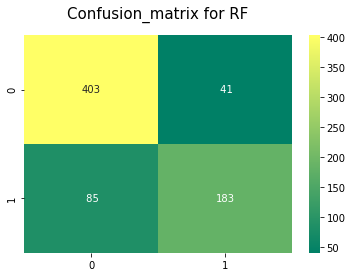

In [40]:

##Random forest
clf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
clf.fit(x_train,  y_train)
print("RF Accuracy: "+repr(round(clf.score(x_test, y_test) * 100, 2)) + "%")
result_rf=cross_val_score(clf,x_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for Random forest is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(clf,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for RF', y=1.05, size=15)

In [41]:
result = clf.predict(X_test)
submission = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':result})
submission.Survived = submission.Survived.astype(int)
print(submission.shape)
filename = 'Titanic Predictions RF.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

(418, 2)
Saved file: Titanic Predictions RF.csv


## Kaggle accuracy for RF : 0.76794

In [42]:
logreg = LogisticRegression()
logreg.fit(X_train,  Y_train)
result = logreg.predict(X_test)
submission = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':result})
submission.Survived = submission.Survived.astype(int)
print(submission.shape)
filename = 'Titanic Predictions LG.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)


(418, 2)
Saved file: Titanic Predictions LG.csv


In [60]:
#grid_logreg_acc.best_estimator_

LogisticRegression(C=5)

## Kaggle accuracy for LG : 0.77990

In [59]:
from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_logreg_acc = GridSearchCV(logreg, param_grid = grid_values,scoring = 'recall')
grid_logreg_acc.fit(X_train, Y_train)

#Predict values based on new parameters
y_pred_acc = grid_logreg_acc.predict(X_test)
submission = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':y_pred_acc})
submission.Survived = submission.Survived.astype(int)
print(submission.shape)
filename = 'Titanic Predictions LG hypertuned.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/envs/py38/lib/

(418, 2)
Saved file: Titanic Predictions LG hypertuned.csv


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/py38/l

## Kaggle score : 0.78708

In [43]:
X_train.rename(columns={'Age_Range_(0, 10]': 'Age0', 
                  'Age_Range_(10, 20]': 'Age1',
                  'Age_Range_(20, 30]': 'Age2',
                  'Age_Range_(30, 40]': 'Age3',
                  'Age_Range_(40, 50]': 'Age4',
                  'Age_Range_(50, 60]': 'Age5',
                  'Age_Range_(60, 70]': 'Age6',
                  'Age_Range_(70, 80]': 'Age7',}, inplace=True)
X_test.rename(columns={'Age_Range_(0, 10]': 'Age0', 
                  'Age_Range_(10, 20]': 'Age1',
                  'Age_Range_(20, 30]': 'Age2',
                  'Age_Range_(30, 40]': 'Age3',
                  'Age_Range_(40, 50]': 'Age4',
                  'Age_Range_(50, 60]': 'Age5',
                  'Age_Range_(60, 70]': 'Age6',
                  'Age_Range_(70, 80]': 'Age7',}, inplace=True)


In [44]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
result = xgb.predict(X_test)
submission = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':result})
submission.Survived = submission.Survived.astype(int)
print(submission.shape)
filename = 'Titanic Predictions XGBoost.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)


[21:40:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(418, 2)
Saved file: Titanic Predictions XGBoost.csv


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


## Kaggle accuracy for XGBoost : 0.75119

### Tuning the XGBoost

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve, auc, make_scorer, confusion_matrix, f1_score, fbeta_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
param_test1 = {
    'n_estimators': [500,750],
    'max_depth': [3,5],
    'min_child_weight': [1,3],
    'gamma':[0,0.1],
    'subsample':[0.8,1],
    'colsample_bytree':[0.5,0.6],
    'reg_alpha':[0, 0.001],
    'learning_rate': [0.01, 0.02]
}
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
gsearch1 = GridSearchCV(estimator = XGBClassifier(), 
                       param_grid = param_test1, 
                       scoring=scoring, iid=False,
                       cv=5, verbose = 5, 
                       refit='Accuracy')
gsearch1.fit(X_train, Y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:58:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.868, Accuracy=0.832, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:58:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.830, Accuracy=0.820, total=   0.9s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:58:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.897, Accuracy=0.831, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:58:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.871, Accuracy=0.803, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:58:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s remaining:    0.0s
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.912, Accuracy=0.843, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[09:58:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.876, Accuracy=0.849, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[09:58:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.831, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[09:58:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.901, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[09:58:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.866, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[09:58:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.915, Accuracy=0.843, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:58:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.868, Accuracy=0.832, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:58:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.830, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:58:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.897, Accuracy=0.831, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:58:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.871, Accuracy=0.803, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:58:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.912, Accuracy=0.843, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[09:58:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.876, Accuracy=0.849, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[09:58:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.831, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[09:58:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.901, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[09:58:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.866, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[09:58:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.915, Accuracy=0.843, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:58:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.865, Accuracy=0.816, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:58:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.835, Accuracy=0.831, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:58:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.904, Accuracy=0.826, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:58:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.870, Accuracy=0.792, total=   0.9s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:58:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.912, Accuracy=0.843, total=   1.0s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[09:58:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.874, Accuracy=0.827, total=   1.0s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[09:58:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.837, Accuracy=0.826, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[09:58:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.905, Accuracy=0.820, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[09:58:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.868, Accuracy=0.792, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[09:58:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.911, Accuracy=0.826, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:58:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.865, Accuracy=0.816, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:58:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.835, Accuracy=0.831, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:58:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.904, Accuracy=0.826, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:58:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.870, Accuracy=0.792, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:58:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.913, Accuracy=0.843, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:58:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.874, Accuracy=0.827, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:58:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.838, Accuracy=0.826, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:58:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.905, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:58:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.867, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:58:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.911, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:58:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.860, Accuracy=0.832, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:58:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.830, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:58:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.899, Accuracy=0.831, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:58:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.872, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:58:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.906, Accuracy=0.837, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[09:58:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.866, Accuracy=0.849, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[09:58:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.829, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[09:58:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.900, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[09:58:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.871, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[09:58:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.911, Accuracy=0.837, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:58:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.860, Accuracy=0.832, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:58:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.829, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:58:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.899, Accuracy=0.831, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:58:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.872, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:58:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.906, Accuracy=0.837, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[09:58:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.867, Accuracy=0.844, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[09:58:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.829, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[09:58:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.900, Accuracy=0.826, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[09:58:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.872, Accuracy=0.792, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[09:58:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.911, Accuracy=0.837, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:58:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.858, Accuracy=0.827, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:58:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.835, Accuracy=0.826, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:58:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.902, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:58:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.873, Accuracy=0.792, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:58:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.907, Accuracy=0.837, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[09:58:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.864, Accuracy=0.827, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[09:58:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.829, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[09:58:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.900, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[09:58:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.874, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[09:58:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.909, Accuracy=0.848, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:58:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.858, Accuracy=0.827, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:58:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.834, Accuracy=0.826, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:58:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.902, Accuracy=0.826, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:58:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.874, Accuracy=0.792, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:58:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.907, Accuracy=0.837, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:58:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.863, Accuracy=0.827, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:58:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.830, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:58:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.900, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:58:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.874, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:58:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.911, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:58:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.865, Accuracy=0.810, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:58:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.834, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:58:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.912, Accuracy=0.831, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:58:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.869, Accuracy=0.803, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:58:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.908, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[09:58:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.871, Accuracy=0.821, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[09:58:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.837, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[09:58:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.911, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[09:58:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.871, Accuracy=0.798, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[09:58:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.908, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:58:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.865, Accuracy=0.810, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:58:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.833, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:58:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.912, Accuracy=0.831, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:58:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.869, Accuracy=0.803, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:58:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.908, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[09:58:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.872, Accuracy=0.821, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[09:59:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.838, Accuracy=0.815, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[09:59:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.911, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[09:59:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.872, Accuracy=0.798, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[09:59:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.908, Accuracy=0.854, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:59:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.865, Accuracy=0.804, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:59:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.837, Accuracy=0.798, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:59:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.915, Accuracy=0.831, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:59:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.867, Accuracy=0.809, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:59:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.905, Accuracy=0.843, total=   0.8s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[09:59:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.872, Accuracy=0.810, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[09:59:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.843, Accuracy=0.798, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[09:59:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.912, Accuracy=0.826, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[09:59:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.867, Accuracy=0.809, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[09:59:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.909, Accuracy=0.854, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:59:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.865, Accuracy=0.804, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:59:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.837, Accuracy=0.798, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:59:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.915, Accuracy=0.831, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:59:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.867, Accuracy=0.809, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:59:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.905, Accuracy=0.843, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:59:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.872, Accuracy=0.810, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:59:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.843, Accuracy=0.803, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:59:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.911, Accuracy=0.826, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:59:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.867, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:59:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.909, Accuracy=0.854, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:59:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.851, Accuracy=0.816, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:59:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.834, Accuracy=0.803, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:59:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.910, Accuracy=0.837, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:59:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.872, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:59:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.905, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[09:59:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.861, Accuracy=0.810, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[09:59:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.830, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[09:59:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.909, Accuracy=0.820, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[09:59:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.869, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[09:59:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.907, Accuracy=0.848, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:59:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.852, Accuracy=0.810, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:59:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.834, Accuracy=0.803, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:59:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.910, Accuracy=0.837, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:59:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.872, Accuracy=0.792, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:59:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.905, Accuracy=0.848, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[09:59:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.861, Accuracy=0.810, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[09:59:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.830, Accuracy=0.809, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[09:59:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.909, Accuracy=0.820, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[09:59:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.869, Accuracy=0.792, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[09:59:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.907, Accuracy=0.848, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:59:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.856, Accuracy=0.804, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:59:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.836, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:59:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.913, Accuracy=0.826, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:59:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.873, Accuracy=0.798, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:59:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.904, Accuracy=0.848, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[09:59:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.859, Accuracy=0.804, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[09:59:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.831, Accuracy=0.798, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[09:59:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.912, Accuracy=0.826, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[09:59:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.872, Accuracy=0.798, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[09:59:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.906, Accuracy=0.848, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:59:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.856, Accuracy=0.804, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:59:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.837, Accuracy=0.809, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:59:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.913, Accuracy=0.826, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:59:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.873, Accuracy=0.798, total=   0.8s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:59:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.904, Accuracy=0.848, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:59:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.859, Accuracy=0.804, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:59:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.831, Accuracy=0.798, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:59:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.912, Accuracy=0.826, total=   1.0s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:59:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.872, Accuracy=0.798, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:59:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.906, Accuracy=0.848, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:59:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.864, Accuracy=0.816, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:59:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.838, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:59:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.909, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:59:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.869, Accuracy=0.809, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:59:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.910, Accuracy=0.831, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[09:59:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.872, Accuracy=0.827, total=   0.2s


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[09:59:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.836, Accuracy=0.831, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[09:59:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.904, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[09:59:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.866, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[09:59:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.913, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:59:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.865, Accuracy=0.816, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:59:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.838, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:59:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.908, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:59:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.869, Accuracy=0.809, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:59:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.911, Accuracy=0.831, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[09:59:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.872, Accuracy=0.827, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[09:59:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.833, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[09:59:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.904, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[09:59:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.867, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[09:59:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.913, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:59:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.862, Accuracy=0.816, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:59:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.837, Accuracy=0.815, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:59:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.911, Accuracy=0.815, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:59:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.864, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:59:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.907, Accuracy=0.843, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[09:59:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.871, Accuracy=0.816, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[09:59:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.840, Accuracy=0.831, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[09:59:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.905, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[09:59:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.852, Accuracy=0.803, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[09:59:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.912, Accuracy=0.854, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:59:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.863, Accuracy=0.816, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:59:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.837, Accuracy=0.815, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:59:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.911, Accuracy=0.815, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:59:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.864, Accuracy=0.809, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:59:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.907, Accuracy=0.843, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:59:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.872, Accuracy=0.816, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:59:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.838, Accuracy=0.831, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:59:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.906, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:59:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.856, Accuracy=0.803, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:59:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.911, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:59:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.855, Accuracy=0.821, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:59:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.836, Accuracy=0.815, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:59:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.907, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:59:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, sub

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:59:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.860, Accuracy=0.832, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[09:59:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.832, Accuracy=0.831, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[09:59:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.901, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[09:59:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, t

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.876, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[09:59:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.909, Accuracy=0.843, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:59:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.855, Accuracy=0.810, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:59:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.836, Accuracy=0.815, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:59:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Star

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.907, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:59:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.876, Accuracy=0.803, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:59:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.907, Accuracy=0.854, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[09:59:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.901, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[09:59:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.876, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[09:59:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in 

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.909, Accuracy=0.843, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:59:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.855, Accuracy=0.810, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:59:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.839, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:59:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.909, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:59:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.876, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[09:59:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.904, Accuracy=0.854, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[09:59:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.859, Accuracy=0.810, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[09:59:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.836, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[09:59:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.903, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[09:59:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.871, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[09:59:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.909, Accuracy=0.837, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:59:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.855, Accuracy=0.810, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:59:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.837, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:59:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.909, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:59:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.876, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[09:59:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.904, Accuracy=0.854, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:59:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.859, Accuracy=0.810, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:59:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.838, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:59:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.904, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:59:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.872, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[09:59:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.909, Accuracy=0.837, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:59:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.863, Accuracy=0.799, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:59:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.838, Accuracy=0.787, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:59:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.918, Accuracy=0.831, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:59:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.868, Accuracy=0.815, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[09:59:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.900, Accuracy=0.837, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[09:59:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.866, Accuracy=0.810, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[09:59:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.846, Accuracy=0.787, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[09:59:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.912, Accuracy=0.815, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[09:59:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.869, Accuracy=0.798, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[09:59:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.906, Accuracy=0.843, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:59:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.863, Accuracy=0.799, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:59:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.838, Accuracy=0.787, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:59:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.918, Accuracy=0.831, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[09:59:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.866, Accuracy=0.815, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:00:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.901, Accuracy=0.837, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:00:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.866, Accuracy=0.804, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:00:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.846, Accuracy=0.787, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:00:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.912, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:00:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.869, Accuracy=0.798, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:00:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.907, Accuracy=0.843, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:00:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.851, Accuracy=0.788, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:00:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.841, Accuracy=0.792, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:00:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.918, Accuracy=0.809, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:00:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.864, Accuracy=0.815, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:00:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.895, Accuracy=0.843, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:00:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.857, Accuracy=0.799, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:00:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.848, Accuracy=0.787, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:00:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.916, Accuracy=0.803, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:00:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.865, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:00:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.897, Accuracy=0.843, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:00:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.850, Accuracy=0.793, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:00:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.841, Accuracy=0.792, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:00:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.917, Accuracy=0.815, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:00:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.863, Accuracy=0.815, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:00:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.895, Accuracy=0.843, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:00:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.856, Accuracy=0.793, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:00:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.848, Accuracy=0.787, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:00:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.916, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:00:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.866, Accuracy=0.809, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:00:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.898, Accuracy=0.843, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:00:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.855, Accuracy=0.799, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:00:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.837, Accuracy=0.798, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:00:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.914, Accuracy=0.826, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:00:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.877, Accuracy=0.815, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:00:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.899, Accuracy=0.843, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:00:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.854, Accuracy=0.804, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:00:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.839, Accuracy=0.803, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:00:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.912, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:00:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.863, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:00:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.903, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:00:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.853, Accuracy=0.810, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:00:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.837, Accuracy=0.798, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:00:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.915, Accuracy=0.831, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:00:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.878, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:00:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.899, Accuracy=0.843, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:00:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.854, Accuracy=0.804, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:00:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.839, Accuracy=0.803, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:00:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.914, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:00:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.865, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:00:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.903, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:00:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.848, Accuracy=0.799, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:00:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.841, Accuracy=0.803, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:00:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.915, Accuracy=0.815, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:00:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.873, Accuracy=0.820, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:00:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.894, Accuracy=0.843, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:00:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.848, Accuracy=0.810, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:00:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.840, Accuracy=0.803, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:00:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.914, Accuracy=0.831, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:00:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.856, Accuracy=0.803, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:00:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.897, Accuracy=0.837, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:00:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.848, Accuracy=0.799, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:00:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.842, Accuracy=0.798, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:00:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.914, Accuracy=0.826, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:00:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.873, Accuracy=0.820, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:00:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.894, Accuracy=0.837, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:00:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.848, Accuracy=0.810, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:00:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.840, Accuracy=0.803, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:00:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.914, Accuracy=0.831, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:00:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.857, Accuracy=0.803, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:00:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.898, Accuracy=0.837, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:00:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.867, Accuracy=0.832, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:00:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.831, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:00:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.897, Accuracy=0.831, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:00:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.871, Accuracy=0.803, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:00:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.912, Accuracy=0.843, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:00:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.876, Accuracy=0.844, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:00:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.831, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:00:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.901, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:00:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.866, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:00:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.915, Accuracy=0.843, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:00:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.867, Accuracy=0.832, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:00:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.831, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:00:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.897, Accuracy=0.831, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:00:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.871, Accuracy=0.803, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:00:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.912, Accuracy=0.843, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:00:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.876, Accuracy=0.844, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:00:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.831, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:00:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.901, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:00:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.866, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:00:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.915, Accuracy=0.843, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:00:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.865, Accuracy=0.816, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:00:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.835, Accuracy=0.831, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:00:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.904, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:00:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.870, Accuracy=0.792, total=   0.8s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:00:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.913, Accuracy=0.843, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:00:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.872, Accuracy=0.832, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:00:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.837, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:00:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.905, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:00:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.868, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:00:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.912, Accuracy=0.831, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:00:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.865, Accuracy=0.816, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:00:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.835, Accuracy=0.831, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:00:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.904, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:00:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.870, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:00:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.913, Accuracy=0.843, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:00:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.873, Accuracy=0.832, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:00:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.837, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:00:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.905, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:00:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.868, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:00:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.913, Accuracy=0.837, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:00:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.860, Accuracy=0.832, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:00:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.829, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:00:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.872, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:00:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.905, Accuracy=0.837, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:00:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.866, Accuracy=0.849, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:00:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.827, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:00:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.900, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:00:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.872, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:00:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.912, Accuracy=0.837, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:00:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XG

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.860, Accuracy=0.832, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:00:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.829, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:00:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.899, Accuracy=0.831, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:00:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, re

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:00:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.866, Accuracy=0.849, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:00:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_al

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.900, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:00:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.872, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:00:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Star

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.912, Accuracy=0.837, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:00:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.858, Accuracy=0.821, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:00:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.835, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:00:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.902, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:00:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.874, Accuracy=0.792, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:00:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.907, Accuracy=0.837, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:00:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.863, Accuracy=0.838, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:00:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.829, Accuracy=0.826, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:00:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.900, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:00:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.874, Accuracy=0.792, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:00:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.913, Accuracy=0.848, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:00:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.858, Accuracy=0.821, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:00:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.835, Accuracy=0.826, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:00:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.902, Accuracy=0.826, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:00:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.874, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:00:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.907, Accuracy=0.837, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:00:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.863, Accuracy=0.832, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:00:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.829, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:00:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.900, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:00:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.874, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:00:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.912, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:00:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.865, Accuracy=0.810, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:00:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.832, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:00:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.911, Accuracy=0.831, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:00:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.868, Accuracy=0.803, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:00:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.908, Accuracy=0.848, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:00:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.871, Accuracy=0.816, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:00:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.838, Accuracy=0.815, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:00:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.912, Accuracy=0.826, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:00:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.871, Accuracy=0.798, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:00:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.908, Accuracy=0.848, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:00:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.865, Accuracy=0.810, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:00:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.832, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:00:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.911, Accuracy=0.831, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:00:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.869, Accuracy=0.803, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:00:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.908, Accuracy=0.848, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:00:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.871, Accuracy=0.821, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:00:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.838, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:00:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.912, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:00:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.871, Accuracy=0.798, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:00:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.909, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:00:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.866, Accuracy=0.804, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:00:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.837, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:00:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.916, Accuracy=0.831, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:00:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.868, Accuracy=0.815, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:00:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.905, Accuracy=0.843, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:00:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.872, Accuracy=0.810, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:00:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.841, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:00:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.912, Accuracy=0.826, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:01:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.867, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:01:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.906, Accuracy=0.848, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:01:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.865, Accuracy=0.804, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:01:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.836, Accuracy=0.803, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:01:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.915, Accuracy=0.831, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:01:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.868, Accuracy=0.815, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:01:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.905, Accuracy=0.843, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:01:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.872, Accuracy=0.810, total=   0.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:01:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.840, Accuracy=0.809, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:01:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.912, Accuracy=0.826, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:01:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.867, Accuracy=0.803, total=   0.8s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:01:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.907, Accuracy=0.848, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:01:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.852, Accuracy=0.816, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:01:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.835, Accuracy=0.803, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:01:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.909, Accuracy=0.837, total=   1.0s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:01:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.872, Accuracy=0.792, total=   0.8s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:01:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.905, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:01:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.861, Accuracy=0.810, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:01:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.830, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:01:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.909, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:01:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.869, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:01:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.905, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:01:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.851, Accuracy=0.816, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:01:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.835, Accuracy=0.803, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:01:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.909, Accuracy=0.837, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:01:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.872, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:01:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.905, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:01:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.860, Accuracy=0.810, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:01:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.830, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:01:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.909, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:01:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.869, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:01:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.906, Accuracy=0.848, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:01:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.857, Accuracy=0.804, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:01:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.838, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:01:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.914, Accuracy=0.826, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:01:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.873, Accuracy=0.798, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:01:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.905, Accuracy=0.848, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:01:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.860, Accuracy=0.804, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:01:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.830, Accuracy=0.798, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:01:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.912, Accuracy=0.826, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:01:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.872, Accuracy=0.798, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:01:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.906, Accuracy=0.848, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:01:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.856, Accuracy=0.804, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:01:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.838, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:01:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.914, Accuracy=0.826, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:01:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.873, Accuracy=0.798, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:01:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.905, Accuracy=0.848, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:01:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.860, Accuracy=0.810, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:01:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.830, Accuracy=0.798, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:01:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.912, Accuracy=0.826, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:01:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.872, Accuracy=0.798, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:01:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.907, Accuracy=0.848, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:01:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.865, Accuracy=0.816, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:01:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.838, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:01:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.908, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:01:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.869, Accuracy=0.809, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:01:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.910, Accuracy=0.831, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:01:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.870, Accuracy=0.827, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:01:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.837, Accuracy=0.837, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:01:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.904, Accuracy=0.815, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:01:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.865, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:01:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.911, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:01:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.865, Accuracy=0.816, total=   0.2s


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:01:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.838, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:01:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.908, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:01:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, re

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.910, Accuracy=0.831, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:01:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.872, Accuracy=0.827, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:01:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.837, Accuracy=0.837, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:01:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.905, Accuracy=0.815, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:01:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.867, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:01:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_al

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.863, Accuracy=0.816, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:01:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.835, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:01:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.911, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:01:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.865, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:01:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.907, Accuracy=0.843, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:01:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.872, Accuracy=0.827, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:01:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.844, Accuracy=0.831, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:01:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.904, Accuracy=0.803, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:01:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.852, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:01:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.910, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:01:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.862, Accuracy=0.816, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:01:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.838, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:01:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.911, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:01:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.864, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:01:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.907, Accuracy=0.843, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:01:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.872, Accuracy=0.827, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:01:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.844, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:01:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.905, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:01:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.854, Accuracy=0.803, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:01:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.909, Accuracy=0.854, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:01:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.856, Accuracy=0.810, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:01:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.836, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:01:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.907, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:01:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.877, Accuracy=0.803, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:01:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.908, Accuracy=0.854, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:01:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.860, Accuracy=0.832, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:01:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.831, Accuracy=0.831, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:01:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.901, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:01:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.875, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:01:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.909, Accuracy=0.843, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:01:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.856, Accuracy=0.810, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:01:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.836, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:01:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.908, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:01:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.877, Accuracy=0.803, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:01:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.908, Accuracy=0.854, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:01:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.860, Accuracy=0.832, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:01:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: St

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.831, Accuracy=0.831, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:01:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.900, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:01:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Star

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.875, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:01:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.909, Accuracy=0.843, total=   0.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:01:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starti

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.856, Accuracy=0.810, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:01:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.837, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:01:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.910, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:01:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.876, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:01:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.904, Accuracy=0.854, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:01:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.859, Accuracy=0.810, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:01:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.838, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:01:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.904, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:01:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.872, Accuracy=0.803, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:01:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.909, Accuracy=0.837, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:01:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.855, Accuracy=0.810, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:01:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.837, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:01:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.910, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:01:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.875, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:01:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.904, Accuracy=0.854, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:01:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.858, Accuracy=0.810, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:01:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.836, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:01:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.904, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:01:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.872, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:01:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.909, Accuracy=0.837, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:01:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.863, Accuracy=0.804, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:01:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.837, Accuracy=0.787, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:01:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.918, Accuracy=0.831, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:01:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.867, Accuracy=0.815, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:01:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.901, Accuracy=0.837, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:01:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.864, Accuracy=0.804, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:01:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.847, Accuracy=0.787, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:01:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.912, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:01:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.869, Accuracy=0.798, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:01:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.906, Accuracy=0.843, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:01:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.864, Accuracy=0.799, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:01:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.837, Accuracy=0.787, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:01:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.918, Accuracy=0.831, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:01:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.867, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:01:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.900, Accuracy=0.837, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:01:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.865, Accuracy=0.804, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:01:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.847, Accuracy=0.787, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:01:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.911, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:01:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.869, Accuracy=0.798, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:01:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.907, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:01:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.850, Accuracy=0.788, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:01:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.839, Accuracy=0.787, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:01:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.917, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:01:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.863, Accuracy=0.815, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:01:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.895, Accuracy=0.843, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:01:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.856, Accuracy=0.804, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:01:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.850, Accuracy=0.787, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:01:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.916, Accuracy=0.803, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:01:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.865, Accuracy=0.809, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:01:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.898, Accuracy=0.843, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:01:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.850, Accuracy=0.788, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:01:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.841, Accuracy=0.787, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:01:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.917, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:01:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.864, Accuracy=0.815, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:01:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.896, Accuracy=0.843, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:01:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.854, Accuracy=0.804, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:01:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.852, Accuracy=0.787, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:01:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.916, Accuracy=0.803, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:01:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.865, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:01:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.897, Accuracy=0.843, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:01:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.855, Accuracy=0.804, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:01:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.838, Accuracy=0.798, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:01:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.914, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:01:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.877, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:01:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.899, Accuracy=0.843, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:01:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.855, Accuracy=0.810, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:01:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.836, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:02:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.914, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:02:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.865, Accuracy=0.803, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:02:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.904, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:02:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.855, Accuracy=0.804, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:02:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.837, Accuracy=0.798, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:02:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.914, Accuracy=0.831, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:02:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.877, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:02:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.899, Accuracy=0.843, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:02:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.857, Accuracy=0.804, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:02:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.838, Accuracy=0.798, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:02:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.913, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:02:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.864, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:02:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.903, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:02:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.849, Accuracy=0.799, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:02:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.842, Accuracy=0.798, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:02:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.915, Accuracy=0.820, total=   0.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:02:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.873, Accuracy=0.820, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:02:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.894, Accuracy=0.843, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:02:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.849, Accuracy=0.799, total=   0.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:02:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.839, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:02:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.915, Accuracy=0.831, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:02:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.860, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:02:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.897, Accuracy=0.837, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:02:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.850, Accuracy=0.799, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:02:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.842, Accuracy=0.798, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:02:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.915, Accuracy=0.820, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:02:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.873, Accuracy=0.820, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:02:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.894, Accuracy=0.843, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:02:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.850, Accuracy=0.804, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:02:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.839, Accuracy=0.803, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:02:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.916, Accuracy=0.831, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:02:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.858, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:02:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.898, Accuracy=0.843, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:02:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.869, Accuracy=0.832, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:02:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.829, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:02:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.900, Accuracy=0.831, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:02:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.871, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:02:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.912, Accuracy=0.843, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:02:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.878, Accuracy=0.838, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:02:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.831, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:02:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.905, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:02:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.863, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:02:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.916, Accuracy=0.843, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:02:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.869, Accuracy=0.832, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:02:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.830, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:02:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.900, Accuracy=0.831, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:02:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.870, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:02:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.911, Accuracy=0.843, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:02:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.878, Accuracy=0.838, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:02:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.863, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:02:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.916, Accuracy=0.843, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:02:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XG

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.866, Accuracy=0.816, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:02:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.835, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:02:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.906, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:02:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.869, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:02:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.912, Accuracy=0.843, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:02:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.872, Accuracy=0.821, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:02:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.835, Accuracy=0.831, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:02:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.907, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:02:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.867, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:02:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.914, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:02:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.866, Accuracy=0.816, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:02:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.835, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:02:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.906, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:02:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.869, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:02:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.912, Accuracy=0.843, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:02:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.874, Accuracy=0.838, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:02:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.835, Accuracy=0.831, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:02:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.906, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:02:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.867, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:02:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.915, Accuracy=0.820, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:02:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.862, Accuracy=0.832, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:02:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.830, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:02:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.901, Accuracy=0.831, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:02:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.872, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:02:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.907, Accuracy=0.837, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:02:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.867, Accuracy=0.838, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:02:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.822, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:02:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.902, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:02:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.871, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:02:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.912, Accuracy=0.837, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:02:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.862, Accuracy=0.832, total=   0.2s


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:02:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.830, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:02:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.901, Accuracy=0.831, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:02:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alph

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:02:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.867, Accuracy=0.838, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:02:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.822, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:02:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.901, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:02:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.867, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:02:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in 

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.912, Accuracy=0.837, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:02:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.857, Accuracy=0.827, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:02:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.834, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:02:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.902, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:02:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.876, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:02:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.907, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:02:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.862, Accuracy=0.827, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:02:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.829, Accuracy=0.831, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:02:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.902, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:02:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.873, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:02:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.911, Accuracy=0.837, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:02:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.858, Accuracy=0.827, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:02:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.834, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:02:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.902, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:02:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.876, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:02:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.907, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:02:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.864, Accuracy=0.827, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:02:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.829, Accuracy=0.831, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:02:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.902, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:02:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.873, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:02:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.911, Accuracy=0.837, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:02:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.865, Accuracy=0.816, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:02:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.834, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:02:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.914, Accuracy=0.837, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:02:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.869, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:02:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.906, Accuracy=0.843, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:02:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.872, Accuracy=0.816, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:02:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.838, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:02:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.912, Accuracy=0.831, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:02:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.872, Accuracy=0.798, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:02:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.908, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:02:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.865, Accuracy=0.816, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:02:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.834, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:02:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.914, Accuracy=0.837, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:02:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.869, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:02:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.905, Accuracy=0.843, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:02:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.872, Accuracy=0.816, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:02:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.839, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:02:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.912, Accuracy=0.831, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:02:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.872, Accuracy=0.798, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:02:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.908, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:02:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.862, Accuracy=0.804, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:02:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.840, Accuracy=0.803, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:02:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.917, Accuracy=0.831, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:02:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.867, Accuracy=0.815, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:02:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.903, Accuracy=0.843, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:02:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.872, Accuracy=0.810, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:02:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.842, Accuracy=0.803, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:02:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.910, Accuracy=0.815, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:02:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.868, Accuracy=0.798, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:02:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.907, Accuracy=0.848, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:02:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.862, Accuracy=0.804, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:02:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.840, Accuracy=0.803, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:02:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.917, Accuracy=0.831, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:02:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.867, Accuracy=0.815, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:02:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.903, Accuracy=0.843, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:02:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.872, Accuracy=0.816, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:02:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.842, Accuracy=0.803, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:02:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.910, Accuracy=0.815, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:02:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.869, Accuracy=0.798, total=   0.7s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:02:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.906, Accuracy=0.848, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:02:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.857, Accuracy=0.810, total=   0.9s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:02:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.836, Accuracy=0.803, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:02:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.912, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:02:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.873, Accuracy=0.798, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:02:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.904, Accuracy=0.848, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:02:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.862, Accuracy=0.816, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:02:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.827, Accuracy=0.803, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:02:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.912, Accuracy=0.826, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:02:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.870, Accuracy=0.792, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:02:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.903, Accuracy=0.837, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:02:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.857, Accuracy=0.810, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:02:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.836, Accuracy=0.803, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:02:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.912, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:02:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.873, Accuracy=0.798, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:02:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.904, Accuracy=0.848, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:02:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.862, Accuracy=0.816, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:02:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.827, Accuracy=0.803, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:02:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.912, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:02:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.869, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:02:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.903, Accuracy=0.837, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:02:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.856, Accuracy=0.804, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:02:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.836, Accuracy=0.792, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:03:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.914, Accuracy=0.820, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:03:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.873, Accuracy=0.803, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:03:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.899, Accuracy=0.848, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:03:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.859, Accuracy=0.810, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:03:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.829, Accuracy=0.803, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:03:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.914, Accuracy=0.826, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:03:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.870, Accuracy=0.798, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:03:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.904, Accuracy=0.843, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:03:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.856, Accuracy=0.804, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:03:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.835, Accuracy=0.792, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:03:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.913, Accuracy=0.831, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:03:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.873, Accuracy=0.803, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:03:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.899, Accuracy=0.848, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:03:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.858, Accuracy=0.804, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:03:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.828, Accuracy=0.803, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:03:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.913, Accuracy=0.826, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:03:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.870, Accuracy=0.803, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:03:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.904, Accuracy=0.843, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:03:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.866, Accuracy=0.816, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:03:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.833, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:03:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.908, Accuracy=0.815, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:03:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.871, Accuracy=0.809, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:03:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.910, Accuracy=0.848, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:03:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.873, Accuracy=0.821, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:03:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.835, Accuracy=0.837, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:03:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.906, Accuracy=0.815, total=   0.2s


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:03:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.860, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:03:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.914, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:03:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.866, Accuracy=0.816, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:03:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.833, Accuracy=0.815, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:03:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.909, Accuracy=0.815, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:03:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.871, Accuracy=0.809, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:03:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.910, Accuracy=0.854, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:03:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.874, Accuracy=0.821, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:03:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.836, Accuracy=0.837, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:03:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.906, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:03:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.861, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:03:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.912, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:03:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.865, Accuracy=0.816, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:03:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.831, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:03:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.910, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:03:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.863, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:03:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.907, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:03:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.871, Accuracy=0.821, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:03:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.848, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:03:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.905, Accuracy=0.803, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:03:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.851, Accuracy=0.803, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:03:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.913, Accuracy=0.831, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:03:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.864, Accuracy=0.816, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:03:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.833, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:03:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.910, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:03:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.863, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:03:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.907, Accuracy=0.843, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:03:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.870, Accuracy=0.821, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:03:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.846, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:03:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.905, Accuracy=0.803, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:03:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.851, Accuracy=0.803, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:03:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.912, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:03:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.855, Accuracy=0.810, total=   0.2s


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:03:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.832, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:03:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.907, Accuracy=0.815, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:03:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.877, Accuracy=0.803, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:03:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.907, Accuracy=0.848, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:03:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.856, Accuracy=0.827, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:03:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.829, Accuracy=0.837, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:03:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.904, Accuracy=0.820, total=   0.2s


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:03:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.874, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:03:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behav

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:03:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.855, Accuracy=0.810, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:03:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to res

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.832, Accuracy=0.815, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:03:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.907, Accuracy=0.815, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:03:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.877, Accuracy=0.803, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:03:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.907, Accuracy=0.848, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:03:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.860, Accuracy=0.827, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:03:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.830, Accuracy=0.837, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:03:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.904, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:03:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.874, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:03:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.911, Accuracy=0.848, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:03:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.856, Accuracy=0.810, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:03:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.836, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:03:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.910, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:03:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.873, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:03:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.903, Accuracy=0.854, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:03:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.863, Accuracy=0.821, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:03:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.835, Accuracy=0.826, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:03:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.905, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:03:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.869, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:03:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.909, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:03:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.855, Accuracy=0.810, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:03:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.836, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:03:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.910, Accuracy=0.815, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:03:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.873, Accuracy=0.820, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:03:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.903, Accuracy=0.860, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:03:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.862, Accuracy=0.827, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:03:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.837, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:03:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.907, Accuracy=0.815, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:03:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.870, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:03:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.910, Accuracy=0.837, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:03:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.860, Accuracy=0.793, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:03:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.841, Accuracy=0.792, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:03:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.921, Accuracy=0.826, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:03:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.868, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:03:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.901, Accuracy=0.848, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:03:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.865, Accuracy=0.799, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:03:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.846, Accuracy=0.798, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:03:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.912, Accuracy=0.809, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:03:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.869, Accuracy=0.798, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:03:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.902, Accuracy=0.848, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:03:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.860, Accuracy=0.799, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:03:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.841, Accuracy=0.792, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:03:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.921, Accuracy=0.826, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:03:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.868, Accuracy=0.815, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:03:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.900, Accuracy=0.848, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:03:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.863, Accuracy=0.821, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:03:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.845, Accuracy=0.798, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:03:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.912, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:03:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.871, Accuracy=0.798, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:03:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.901, Accuracy=0.848, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:03:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.852, Accuracy=0.799, total=   0.7s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:03:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.841, Accuracy=0.792, total=   0.7s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:03:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.920, Accuracy=0.820, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:03:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.862, Accuracy=0.809, total=   0.8s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:03:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.895, Accuracy=0.848, total=   0.7s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:03:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.856, Accuracy=0.804, total=   0.8s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:03:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.849, Accuracy=0.798, total=   0.7s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:03:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.913, Accuracy=0.809, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:03:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.867, Accuracy=0.809, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:03:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.895, Accuracy=0.843, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:03:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.851, Accuracy=0.793, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:03:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.843, Accuracy=0.792, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:03:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.920, Accuracy=0.820, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:03:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.861, Accuracy=0.809, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:03:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.895, Accuracy=0.848, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:03:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.854, Accuracy=0.810, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:03:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.848, Accuracy=0.798, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:03:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.913, Accuracy=0.809, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:03:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.866, Accuracy=0.809, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:03:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.895, Accuracy=0.843, total=   0.7s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:03:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.852, Accuracy=0.804, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:03:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.842, Accuracy=0.798, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:03:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.915, Accuracy=0.831, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:03:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.874, Accuracy=0.815, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:03:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.898, Accuracy=0.848, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:03:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.856, Accuracy=0.810, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:03:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.835, Accuracy=0.809, total=   0.7s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:03:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.915, Accuracy=0.831, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:03:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.864, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:03:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.901, Accuracy=0.843, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:03:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.853, Accuracy=0.804, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:03:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.844, Accuracy=0.798, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:03:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.915, Accuracy=0.831, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:03:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.874, Accuracy=0.815, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:03:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.897, Accuracy=0.848, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:03:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.855, Accuracy=0.804, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:04:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.836, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:04:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.913, Accuracy=0.831, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:04:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.864, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:04:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.900, Accuracy=0.843, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:04:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.847, Accuracy=0.799, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:04:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.842, Accuracy=0.792, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:04:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.915, Accuracy=0.826, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:04:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.871, Accuracy=0.815, total=   0.7s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:04:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.892, Accuracy=0.843, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:04:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.850, Accuracy=0.810, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:04:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.837, Accuracy=0.803, total=   0.8s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:04:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.916, Accuracy=0.831, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:04:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.860, Accuracy=0.803, total=   0.9s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:04:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.896, Accuracy=0.837, total=   0.8s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:04:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.847, Accuracy=0.799, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:04:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.842, Accuracy=0.792, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:04:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.915, Accuracy=0.826, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:04:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.872, Accuracy=0.815, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:04:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.892, Accuracy=0.837, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:04:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.850, Accuracy=0.810, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:04:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.836, Accuracy=0.803, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:04:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.915, Accuracy=0.831, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:04:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.860, Accuracy=0.803, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:04:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.895, Accuracy=0.837, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:04:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.869, Accuracy=0.832, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:04:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.829, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:04:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.900, Accuracy=0.831, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:04:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.870, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:04:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.912, Accuracy=0.843, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:04:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.877, Accuracy=0.844, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:04:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.831, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:04:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.906, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:04:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.862, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:04:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.917, Accuracy=0.843, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:04:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.869, Accuracy=0.832, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:04:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.829, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:04:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.900, Accuracy=0.831, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:04:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.870, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:04:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.912, Accuracy=0.843, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:04:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.877, Accuracy=0.844, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:04:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.830, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:04:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.905, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:04:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.863, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:04:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.916, Accuracy=0.843, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:04:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.867, Accuracy=0.816, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:04:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.836, Accuracy=0.815, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:04:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.906, Accuracy=0.820, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:04:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.870, Accuracy=0.792, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:04:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.912, Accuracy=0.843, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:04:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.873, Accuracy=0.827, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:04:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.836, Accuracy=0.831, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:04:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.907, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:04:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.864, Accuracy=0.792, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:04:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.914, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:04:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.866, Accuracy=0.816, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:04:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.836, Accuracy=0.815, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:04:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.906, Accuracy=0.820, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:04:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.871, Accuracy=0.792, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:04:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.911, Accuracy=0.843, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:04:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.872, Accuracy=0.827, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:04:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.835, Accuracy=0.831, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:04:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.907, Accuracy=0.826, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:04:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.865, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:04:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.915, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:04:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.861, Accuracy=0.832, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:04:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.830, Accuracy=0.815, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:04:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.901, Accuracy=0.831, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:04:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.873, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:04:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.907, Accuracy=0.837, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:04:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.867, Accuracy=0.838, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:04:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoos

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.822, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:04:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.902, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:04:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.866, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:04:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.911, Accuracy=0.837, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:04:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XG

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.862, Accuracy=0.832, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:04:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.830, Accuracy=0.815, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:04:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:10

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.901, Accuracy=0.831, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:04:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.873, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:04:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:10

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.907, Accuracy=0.837, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:04:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.867, Accuracy=0.838, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:04:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: St

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.822, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:04:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.902, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:04:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Star

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.866, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:04:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.911, Accuracy=0.837, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:04:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.858, Accuracy=0.827, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:04:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.833, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:04:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.903, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:04:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.877, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:04:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.907, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:04:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.862, Accuracy=0.827, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:04:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.829, Accuracy=0.831, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:04:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.902, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:04:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.872, Accuracy=0.792, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:04:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.911, Accuracy=0.837, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:04:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.858, Accuracy=0.827, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:04:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.833, Accuracy=0.826, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:04:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.902, Accuracy=0.826, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:04:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.876, Accuracy=0.792, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:04:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.907, Accuracy=0.848, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:04:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.863, Accuracy=0.827, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:04:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.829, Accuracy=0.831, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:04:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.902, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:04:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.872, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:04:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.911, Accuracy=0.837, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:04:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.864, Accuracy=0.816, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:04:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.833, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:04:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.914, Accuracy=0.837, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:04:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.869, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:04:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.905, Accuracy=0.843, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:04:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.872, Accuracy=0.816, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:04:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.838, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:04:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.911, Accuracy=0.831, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:04:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.872, Accuracy=0.798, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:04:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.909, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:04:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.864, Accuracy=0.816, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:04:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.833, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:04:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.914, Accuracy=0.837, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:04:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.870, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:04:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.905, Accuracy=0.843, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:04:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.871, Accuracy=0.810, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:04:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.838, Accuracy=0.815, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:04:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.911, Accuracy=0.831, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:04:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.872, Accuracy=0.798, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:04:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.908, Accuracy=0.848, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:04:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.861, Accuracy=0.804, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:04:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.838, Accuracy=0.803, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:04:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.916, Accuracy=0.831, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:04:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.867, Accuracy=0.815, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:04:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.903, Accuracy=0.843, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:04:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.871, Accuracy=0.816, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:04:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.843, Accuracy=0.803, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:04:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.911, Accuracy=0.815, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:04:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.869, Accuracy=0.798, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:04:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.904, Accuracy=0.848, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:04:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.861, Accuracy=0.804, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:04:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.838, Accuracy=0.803, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:04:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.916, Accuracy=0.831, total=   0.7s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:04:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.867, Accuracy=0.815, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:04:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.903, Accuracy=0.843, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:04:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.870, Accuracy=0.810, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:04:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.843, Accuracy=0.803, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:04:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.911, Accuracy=0.815, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:04:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.869, Accuracy=0.798, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:04:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.904, Accuracy=0.848, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:04:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.857, Accuracy=0.810, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:04:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.836, Accuracy=0.803, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:04:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.912, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:04:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.873, Accuracy=0.798, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:04:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.905, Accuracy=0.848, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:04:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.864, Accuracy=0.816, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:04:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.827, Accuracy=0.803, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:04:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.912, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:04:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.870, Accuracy=0.792, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:04:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.904, Accuracy=0.837, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:04:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.857, Accuracy=0.810, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:04:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.835, Accuracy=0.803, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:05:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.912, Accuracy=0.826, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:05:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.873, Accuracy=0.798, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:05:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.904, Accuracy=0.848, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:05:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.863, Accuracy=0.816, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:05:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.827, Accuracy=0.803, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:05:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.913, Accuracy=0.826, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:05:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.870, Accuracy=0.792, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:05:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.904, Accuracy=0.837, total=   0.7s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:05:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.855, Accuracy=0.804, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:05:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.834, Accuracy=0.792, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:05:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.915, Accuracy=0.820, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:05:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.873, Accuracy=0.803, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:05:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.901, Accuracy=0.848, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:05:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.859, Accuracy=0.804, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:05:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.826, Accuracy=0.803, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:05:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.914, Accuracy=0.826, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:05:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.870, Accuracy=0.798, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:05:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.905, Accuracy=0.843, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:05:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.855, Accuracy=0.804, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:05:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.834, Accuracy=0.792, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:05:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.915, Accuracy=0.820, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:05:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.873, Accuracy=0.809, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:05:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.900, Accuracy=0.848, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:05:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.859, Accuracy=0.804, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:05:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.827, Accuracy=0.803, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:05:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.914, Accuracy=0.826, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:05:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.871, Accuracy=0.798, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:05:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.905, Accuracy=0.843, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:05:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.866, Accuracy=0.821, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:05:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.832, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:05:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.908, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:05:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.871, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:05:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.910, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:05:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.871, Accuracy=0.827, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:05:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.841, Accuracy=0.843, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:05:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.905, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:05:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.864, Accuracy=0.792, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:05:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.912, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:05:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.866, Accuracy=0.821, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:05:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.832, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:05:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.908, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:05:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.871, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:05:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.909, Accuracy=0.848, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:05:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.872, Accuracy=0.827, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:05:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.841, Accuracy=0.843, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:05:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.906, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:05:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_al

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.914, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:05:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.865, Accuracy=0.816, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:05:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.832, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:05:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.909, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:05:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.862, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:05:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.908, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:05:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.870, Accuracy=0.821, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:05:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.849, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:05:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.905, Accuracy=0.803, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:05:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.853, Accuracy=0.803, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:05:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.912, Accuracy=0.837, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:05:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.865, Accuracy=0.816, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:05:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.832, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:05:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.910, Accuracy=0.815, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:05:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.863, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:05:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.908, Accuracy=0.848, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:05:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.871, Accuracy=0.816, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:05:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.847, Accuracy=0.820, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:05:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.905, Accuracy=0.803, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:05:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.847, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:05:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.913, Accuracy=0.843, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:05:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.857, Accuracy=0.810, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:05:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting i

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.833, Accuracy=0.815, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:05:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.907, Accuracy=0.815, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:05:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in 

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.875, Accuracy=0.803, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:05:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.907, Accuracy=0.854, total=   0.2s


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:05:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.859, Accuracy=0.827, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:05:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.831, Accuracy=0.837, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:05:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.905, Accuracy=0.820, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:05:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.873, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:05:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.912, Accuracy=0.848, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:05:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.856, Accuracy=0.810, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:05:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.833, Accuracy=0.815, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:05:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.907, Accuracy=0.826, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:05:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.876, Accuracy=0.803, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:05:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.907, Accuracy=0.854, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:05:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.859, Accuracy=0.827, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:05:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.828, Accuracy=0.837, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:05:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.903, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:05:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.874, Accuracy=0.792, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:05:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.910, Accuracy=0.848, total=   0.2s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:05:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.855, Accuracy=0.810, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:05:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.836, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:05:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.910, Accuracy=0.826, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:05:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.872, Accuracy=0.820, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:05:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.903, Accuracy=0.854, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:05:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.861, Accuracy=0.827, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:05:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.836, Accuracy=0.826, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:05:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.906, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:05:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.868, Accuracy=0.809, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:05:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.909, Accuracy=0.837, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:05:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.855, Accuracy=0.810, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:05:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.836, Accuracy=0.815, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:05:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.911, Accuracy=0.826, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:05:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.874, Accuracy=0.820, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:05:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.903, Accuracy=0.854, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:05:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.861, Accuracy=0.827, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:05:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.835, Accuracy=0.826, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:05:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.905, Accuracy=0.820, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:05:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.871, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:05:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.910, Accuracy=0.843, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:05:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.861, Accuracy=0.799, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:05:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.842, Accuracy=0.792, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:05:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.920, Accuracy=0.826, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:05:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.869, Accuracy=0.815, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:05:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.900, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:05:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.863, Accuracy=0.816, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:05:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.848, Accuracy=0.798, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:05:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.913, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:05:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.870, Accuracy=0.798, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1 
[10:05:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.901, Accuracy=0.843, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:05:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.861, Accuracy=0.799, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:05:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.841, Accuracy=0.792, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:05:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.920, Accuracy=0.831, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:05:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.869, Accuracy=0.815, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:05:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.900, Accuracy=0.848, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:05:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.863, Accuracy=0.816, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:05:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.848, Accuracy=0.798, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:05:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.913, Accuracy=0.809, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:05:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.871, Accuracy=0.798, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:05:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.900, Accuracy=0.843, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:05:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.851, Accuracy=0.793, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:05:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.842, Accuracy=0.792, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:05:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.919, Accuracy=0.815, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:05:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.862, Accuracy=0.815, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:05:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.895, Accuracy=0.848, total=   0.7s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:05:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.855, Accuracy=0.799, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:05:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.848, Accuracy=0.798, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:05:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.915, Accuracy=0.803, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:05:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.863, Accuracy=0.809, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1 
[10:05:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.893, Accuracy=0.843, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:05:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.852, Accuracy=0.793, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:05:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.842, Accuracy=0.792, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:05:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.918, Accuracy=0.815, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:05:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.863, Accuracy=0.815, total=   0.7s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:05:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.894, Accuracy=0.854, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:05:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.854, Accuracy=0.799, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:05:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.848, Accuracy=0.798, total=   0.7s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:05:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.914, Accuracy=0.803, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:05:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.866, Accuracy=0.809, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:05:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.892, Accuracy=0.843, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:05:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.852, Accuracy=0.810, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:05:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.843, Accuracy=0.798, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:05:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.914, Accuracy=0.831, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:05:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.874, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8 
[10:05:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=0.8, AUC=0.897, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:05:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.856, Accuracy=0.810, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:05:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.837, Accuracy=0.815, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:05:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.914, Accuracy=0.831, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:05:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.863, Accuracy=0.803, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1 
[10:05:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0, subsample=1, AUC=0.901, Accuracy=0.843, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:05:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.852, Accuracy=0.804, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:06:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.839, Accuracy=0.798, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:06:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.915, Accuracy=0.831, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:06:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.874, Accuracy=0.815, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8 
[10:06:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=0.8, AUC=0.897, Accuracy=0.848, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:06:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.856, Accuracy=0.810, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:06:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.839, Accuracy=0.803, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:06:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.913, Accuracy=0.831, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:06:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.866, Accuracy=0.803, total=   0.3s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1 
[10:06:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=500, reg_alpha=0.001, subsample=1, AUC=0.900, Accuracy=0.843, total=   0.4s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:06:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.847, Accuracy=0.799, total=   0.7s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:06:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.843, Accuracy=0.798, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:06:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.915, Accuracy=0.820, total=   0.7s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:06:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.871, Accuracy=0.815, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8 
[10:06:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=0.8, AUC=0.892, Accuracy=0.843, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:06:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.850, Accuracy=0.810, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:06:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.837, Accuracy=0.803, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:06:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.915, Accuracy=0.826, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:06:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.861, Accuracy=0.803, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1 
[10:06:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0, subsample=1, AUC=0.897, Accuracy=0.837, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:06:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.848, Accuracy=0.799, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:06:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.842, Accuracy=0.798, total=   0.5s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:06:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.915, Accuracy=0.826, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:06:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.871, Accuracy=0.815, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8 
[10:06:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=0.8, AUC=0.892, Accuracy=0.843, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:06:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.850, Accuracy=0.810, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:06:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.839, Accuracy=0.803, total=   0.8s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:06:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.916, Accuracy=0.831, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:06:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.861, Accuracy=0.803, total=   0.6s
[CV] colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1 
[10:06:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=750, reg_alpha=0.001, subsample=1, AUC=0.895, Accuracy=0.831, total=   0.7s
[10:06:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done 1280 out of 1280 | elapsed:  7.8min finished
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             iid=False,
             param_grid={'colsample_bytree': [0.5, 0.6], 'gamma': [0, 0.1],
                         'learning_rate': [0.01,

In [49]:
gsearch1.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
xgb_t = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb_t.fit(X_train, Y_train)
result = xgb_t.predict(X_test)
submission = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':result})
submission.Survived = submission.Survived.astype(int)
print(submission.shape)
filename = 'Titanic Predictions XGBoost hypertuned.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

[10:27:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(418, 2)
Saved file: Titanic Predictions XGBoost hypertuned.csv


## This gave a kaggle accuracy of : 0.76794
